In [1]:
%load_ext autoreload
%autoreload 2
%cd '/home/xingyu/Projects/PlasticineLab'
%pwd


from chester.plotting.cplot import *

data_paths = ['data/local/0722_PushSpread_train_fea_aug/0722_PushSpread_train_fea_aug_2021_07_23_12_12_33_0001/']

exps_data, plottable_keys, distinct_params = reload_data(data_paths)

/home/xingyu/Projects/PlasticineLab
['data/local/0722_PushSpread_train_fea_aug/0722_PushSpread_train_fea_aug_2021_07_23_12_12_33_0001/']
finished walking exp folders
Reading data/local/0722_PushSpread_train_fea_aug/0722_PushSpread_train_fea_aug_2021_07_23_12_12_33_0001/progress.csv
Reading data/local/0722_PushSpread_train_fea_aug/0722_PushSpread_train_fea_aug_2021_07_23_12_12_33_0001/log/progress.csv
[Errno 2] No such file or directory: 'data/local/0722_PushSpread_train_fea_aug/0722_PushSpread_train_fea_aug_2021_07_23_12_12_33_0001/log/progress.csv'


here


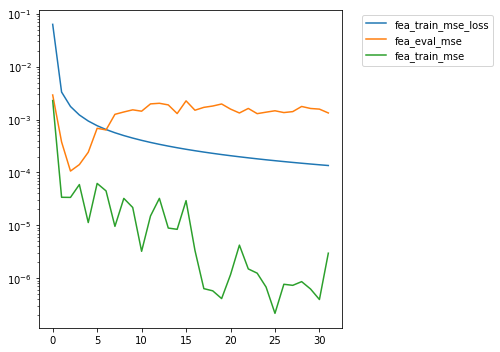

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def custom_series_splitter(x):
    params = x['flat_params']
    return 'x'
    
    frame_stack = params['frame_stack']
    hindsight_goal_ratio = params['hindsight_goal_ratio']
    img_mode = params['img_mode']
    if img_mode =='d':
        return 'filtered'
    if hindsight_goal_ratio == 1.:
        return 'filtered'
    exp_id = params['exp_name'][-4:]
    return f"frame stack: {frame_stack}, hindsight ratio: {hindsight_goal_ratio}, img_mode: {img_mode}, {exp_id}"

group_selectors, group_legends = get_group_selectors(exps_data, custom_series_splitter)
print('here')

keys = ['fea_train_mse_loss', 'fea_eval_mse', 'fea_train_mse']
fig = plt.figure(figsize=(5,5))
for idx, (selector, legend) in enumerate(zip(group_selectors, group_legends)):
    if legend == 'filtered':
        continue
    for key in keys:
        y = [exp.progress.get(key, np.array([np.nan])) for exp in selector.extract()][0]
        plt.plot(list(range(len(y))), y, label=key)
# plt.ylim(0, 0.05)
plt.yscale('log')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./data/plots/0718_fea_train.png', bbox_inches="tight")
plt.show()